In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from meteostat import Point, Daily


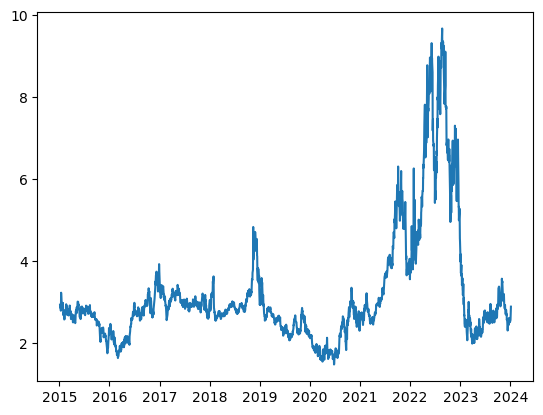

In [3]:
NG = yf.Ticker("NG=F").history(period="108mo")['Close']
plt.plot(NG)

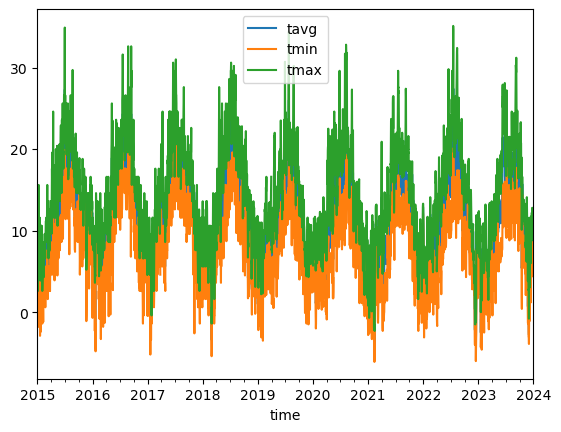

In [4]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2024, 1, 1)

# Create Point for Vancouver, BC
location = Point(51.5072, -0.1276, 70)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

<AxesSubplot:xlabel='time'>

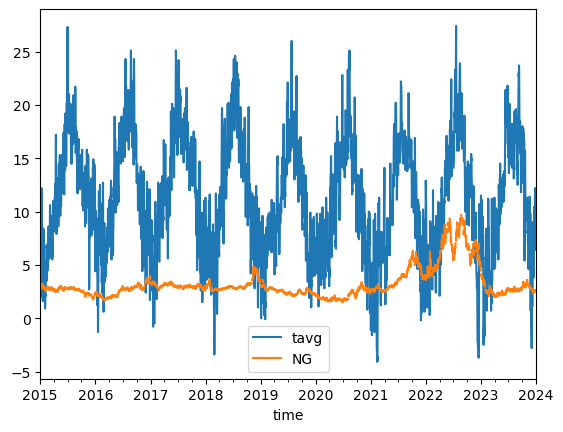

In [5]:
NG.index = NG.index.date
NG.index = pd.DatetimeIndex(NG.index)
data["NG"] = NG
data.plot(y=['tavg', 'NG'])


In [6]:
from sklearn.linear_model import LinearRegression
f_data = data[["NG", "tavg"]]
f_data = f_data.dropna()
f_data["EDD"] = abs(f_data["tavg"] -20)

In [7]:
reg = LinearRegression().fit(np.array(f_data["NG"]).reshape(-1, 1), np.array(f_data["EDD"]).reshape(-1, 1))
reg.coef_

array([[-0.30083629]])

In [8]:
x = f_data.drop(columns = ["NG", "tavg"])

y = f_data.drop(columns = ["EDD", "tavg"])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)



reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)
print(reg.coef_)

y_pred_mlr= reg.predict(x_test)


from sklearn import metrics

from sklearn.metrics import r2_score


meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(reg.score(x,y)))

r2 = r2_score(y_test, reg.predict(x_test))
r2


[[-0.02608733]]
R squared: 0.01


0.003526186932171438